In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, BatchNormalization, Input, MaxPool2D, Reshape, Softmax
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train_ori, _), (x_test_ori, _) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
import matplotlib.pyplot as plt

In [4]:
def slice(x): return np.array([x[0:16, 0:16], x[0:16, 16:32], x[16:32, 0:16], x[16:32, 16:32]])

def together(x):
    [t1, t2, t3, t4] = x
    return np.concatenate((np.concatenate((t1, t2), axis=1),
                           np.concatenate((t3, t4), axis=1)), axis=0)

In [5]:
x_train = []
y_train = []

for i in x_train_ori:
    y = np.random.permutation(range(4))
    x = slice(i)
    x = x[y]
    x_train.append(together(x))
    y_train.append(y)

In [6]:
x_test = []
y_test = []

for i in x_test_ori:
    y = np.random.permutation(range(4))
    x = slice(i)
    x = x[y]
    x_test.append(together(x))
    y_test.append(y)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

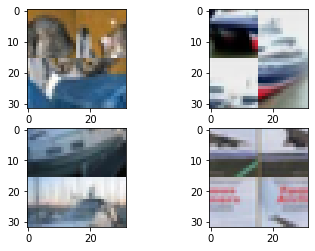

In [7]:
for num, i in enumerate(x_test[:4]):
    ax = plt.subplot(2, 2, num + 1)
    ax.imshow(i)
plt

In [8]:
x_train = np.array(x_train)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [31]:
model = Sequential(name="Shuffle_Finder")

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization(-1))
model.add(Conv2D(16, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization(-1))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization(-1))
model.add(Conv2D(16, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization(-1))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization(-1))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(600))
model.add(Dropout(0.25))
model.add(Dense(300))
model.add(Dropout(0.25))
model.add(Dense(100))
model.add(Dropout(0.25))
model.add(Dense(16))
model.add(Reshape((4, 4)))
model.add(Softmax(axis=2))

In [32]:
model.summary()

Model: "Shuffle_Finder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 16)        2064      
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        2080      
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 16)     

In [17]:
model.predict(x_train[:1]).shape

(1, 4, 4)

In [18]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['acc'],)

In [21]:
checkpoint_filepath = './checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('checkpoint2-epoch-{epoch:02d}-loss-{loss:.2f}-trial-001.h5',             # file명을 지정합니다
                             monitor='loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

In [22]:
model.fit(x_train, y_train, batch_size=500, epochs=20, callbacks=[model_checkpoint_callback])

Epoch 1/20
100/100 [==============================] - ETA: 0s - loss: 0.5574 - acc: 0.7822
Epoch 00001: loss improved from inf to 0.55735, saving model to checkpoint2-epoch-01-loss-0.56-trial-001.h5
100/100 [==============================] - 96s 956ms/step - loss: 0.5574 - acc: 0.7822
Epoch 2/20
100/100 [==============================] - ETA: 0s - loss: 0.5518 - acc: 0.7850
Epoch 00002: loss improved from 0.55735 to 0.55183, saving model to checkpoint2-epoch-02-loss-0.55-trial-001.h5
100/100 [==============================] - 96s 956ms/step - loss: 0.5518 - acc: 0.7850
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 0.5442 - acc: 0.7878
Epoch 00003: loss improved from 0.55183 to 0.54424, saving model to checkpoint2-epoch-03-loss-0.54-trial-001.h5
100/100 [==============================] - 96s 955ms/step - loss: 0.5442 - acc: 0.7878
Epoch 4/20
100/100 [==============================] - ETA: 0s - loss: 0.5410 - acc: 0.7893
Epoch 00004: loss improved from 0.54424 to 

KeyboardInterrupt: ignored

In [27]:
model.load_weights("/content/Untitled Folder/checkpoint-epoch-20-loss-0.56-trial-001.h5")

In [28]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 9s 29ms/step - loss: 0.5324 - acc: 0.7941


[0.532412052154541, 0.7940999865531921]

In [33]:
model = Sequential(name="Shuffle_Finder")

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization(-1))
model.add(Conv2D(16, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization(-1))
model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization(-1))
model.add(Conv2D(16, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization(-1))
model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization(-1))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(600))
model.add(Dropout(0.25))
model.add(Dense(300))
model.add(Dropout(0.25))
model.add(Dense(100))
model.add(Dropout(0.25))
model.add(Dense(16))
model.add(Reshape((4, 4)))
model.add(Softmax(axis=2))